In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
df.head(5)

,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
0,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:19Z,1.0,-31.8027,...,9.0,0.2722,4.0,0.3541,4.0,0.0712,4.0,0.0114,4.0,POINT (114.98013440372972 -31.802694506260686)
1,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:22Z,1.0,-31.8027,...,9.0,0.2642,4.0,0.3463,4.0,0.0675,4.0,0.0133,4.0,POINT (114.98013265657173 -31.802693721740056)
2,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:23Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3398,4.0,0.0675,4.0,0.0128,4.0,POINT (114.98013155928385 -31.802693229028474)
3,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:26Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0666,4.0,0.0104,4.0,POINT (114.98012962223838 -31.802692359243295)
4,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:28Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0634,4.0,0.0104,4.0,POINT (114.9801285199303 -31.802691864277513)


In [2]:
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [3]:
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


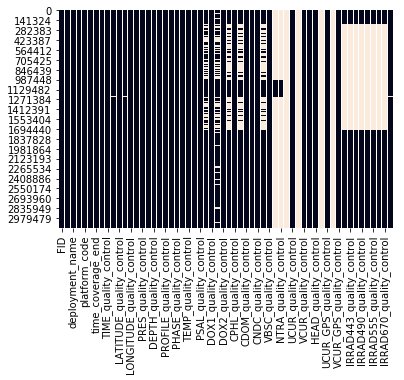

In [5]:
#show the location of missing value
sns.heatmap(df.isnull(), cbar=False)

In [4]:
#delete invalid columns VCUR,UCUR and NTRA
Two_14 = df[df['deployment_name'] == 'TwoRocks20140808']
del Two_14['NTRA']
del Two_14['UCUR']
del Two_14['VCUR']
#find the unique value in PSAL_quality_control
psalQ = Two_14.PSAL_quality_control.unique()
print(psalQ)
#keep good data only
psalValid=Two_14.loc[df['PSAL_quality_control'] == 1.]
Two_14.head(5)

[0. 1. 4. 3. 9.]


,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
2266977,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T02:48:07Z,4.0,-31.8347,...,9.0,96.6469,1.0,71.6836,1.0,77.5327,1.0,64.2709,1.0,POINT (115.57435 -31.83472)
2266978,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T02:48:09Z,4.0,-31.8347,...,9.0,90.7470,1.0,83.0764,1.0,82.2672,1.0,91.5810,1.0,POINT (115.57435 -31.83472)
2266979,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T02:48:11Z,4.0,-31.8347,...,9.0,91.5329,1.0,70.8977,1.0,92.2485,1.0,99.1137,1.0,POINT (115.57435833333332 -31.83471833333333)
2266980,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T02:48:13Z,4.0,-31.8347,...,9.0,87.4582,1.0,73.7684,1.0,73.1599,1.0,95.9498,1.0,POINT (115.57435833333332 -31.83471833333333)
2266981,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T02:48:15Z,4.0,-31.8347,...,9.0,81.7736,1.0,82.7899,1.0,66.1490,1.0,92.1106,1.0,POINT (115.57434333333335 -31.834713333333337)


In [134]:
from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show

# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(Two_14['TIME']).dt.date.values
psalData = Two_14['PSAL'].values
depthData = Two_14['DEPTH'].values

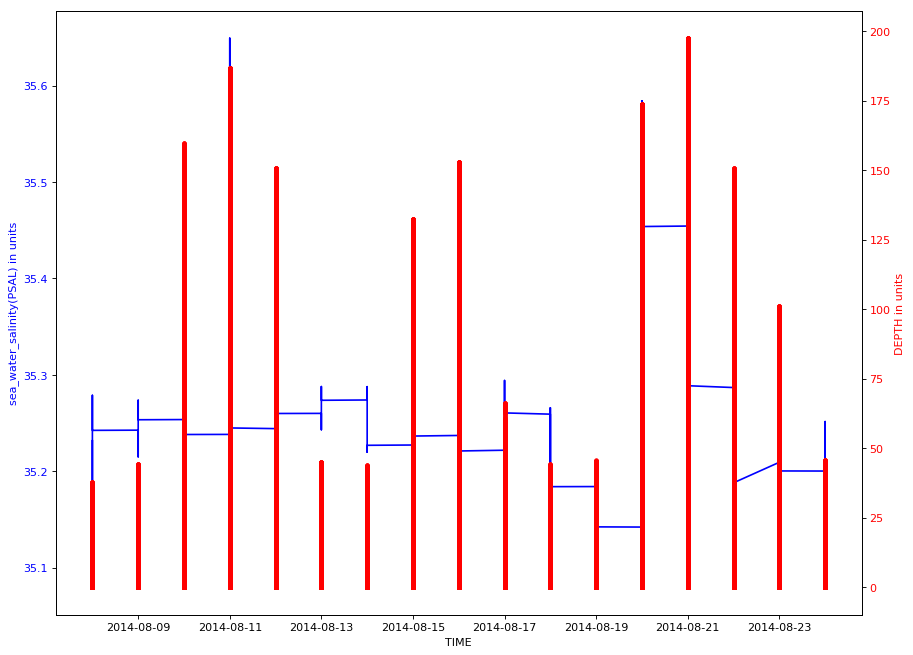

In [136]:
# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [5]:
#detective the not good of PSAL
#it turns out that there are only two items is missing value,so we decide to delete it
psalMissing=Two_14.loc[df['PSAL_quality_control'] == 9.]
#print("the num of missing psal for PSAL is",len(psalMissing)) ------ #the ans is two before
Two_14.drop(df[df['PSAL_quality_control'] == 9.].index, inplace=True)
print("the num of missing psal for PSAL after deleting is",len(psalMissing))
psalInvalid = Two_14.loc[df['PSAL_quality_control'] != 1.]
#the ratio is extremely small which means that we can ignore the invalid data 
#we only focous on those that whose psal_quality_control is 1
print("the ratio of good quality data v.s. bad quality(including missing) is",round(len(psalInvalid)/len(psalValid),3))

the num of missing psal for PSAL after deleting is 2
the ratio of good quality data v.s. bad quality(including missing) is 0.007


In [49]:
#update the Two_14 with psal good quality data only
Two_14 = psalValid

#####then I will do the features selection one by one

#PROFILE:glider_trajectory_profile_number
proQ = Two_14.PROFILE_quality_control.unique()
print(proQ) #all no_qc_performed


#DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water
do2 = Two_14.DOX2_quality_control.unique()
print('the quality type of DOX2 are',do2)
do2bad=Two_14.loc[df['DOX2_quality_control'] == 4.]
print('the number of bad data for DOX2',len(do2bad),', and the pecentage is',round(len(do2bad)/len(Two_14),4)*100,'%')
#update Two_14
Two_14 = Two_14[(Two_14['DOX2_quality_control'] != 4.)]
do2missing = Two_14.loc[df['DOX2_quality_control'] != 1.]
print('number of missing value is:',len(do2missing),'and the pecentage is',round(len(do2missing)/len(Two_14),4)*100,'%')
do2missing.head(5)

[0.]
the quality type of DOX2 are [9. 1. 4.]
the number of bad data for DOX2 8 , and the pecentage is 0.0 %
number of missing value is: 55056 and the pecentage is 8.08 %


,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
2268964,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T03:54:21Z,1.0,-31.8255,...,9.0,104.5551,1.0,126.8223,1.0,115.8032,1.0,107.7138,1.0,POINT (115.57007578502126 -31.825452931927956)
2268965,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T03:54:23Z,1.0,-31.8255,...,9.0,122.7953,1.0,129.5895,1.0,116.0941,1.0,120.9585,1.0,POINT (115.57007696589437 -31.825452656516653)
2268966,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T03:54:25Z,1.0,-31.8255,...,9.0,100.1251,1.0,90.9077,1.0,102.0622,1.0,93.4221,1.0,POINT (115.5700781775344 -31.825452373929682)
2268967,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T03:54:27Z,1.0,-31.8255,...,9.0,97.6680,1.0,83.2426,1.0,89.8697,1.0,98.2030,1.0,POINT (115.57007934959007 -31.825452100574847)
2268968,anfog_dm_trajectory_data.fid-7f408395_17491812...,189,TwoRocks20140808,slocum glider,SL281,2014-08-08T02:48:06Z,2014-08-24T22:39:08Z,2014-08-08T03:54:29Z,1.0,-31.8255,...,9.0,87.6008,1.0,89.7794,1.0,84.0332,1.0,97.6172,1.0,POINT (115.5700804701184 -31.825451839237562)


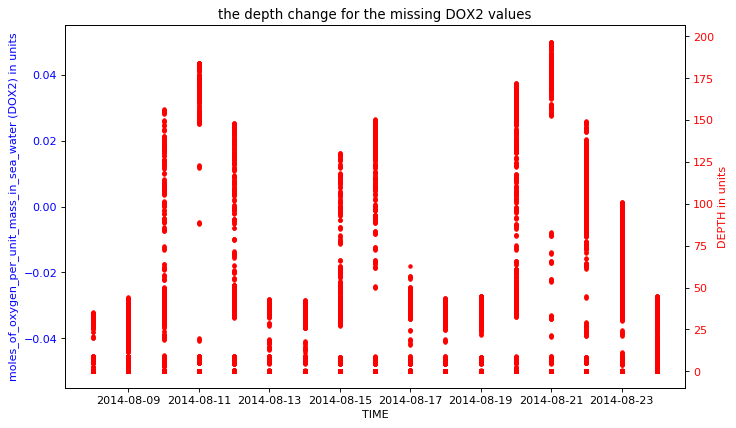

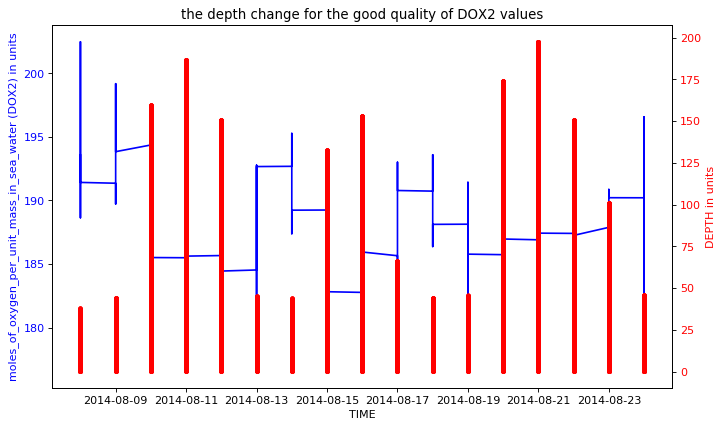

In [54]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
depthData = do2missing['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure1 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,do2Data, 'b-')
ax1.set_xlabel('TIME')
ax1.set_title('the depth change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    

# good quality DOX2
do2Valid=Two_14.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
depthvData = do2Valid['DEPTH'].values

# plot depth and DOX2 good quality data timeseries
figure2 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax3 = figure2.add_subplot(111)
ax3.plot(TIME,do2vData, 'b-')
ax3.set_xlabel('TIME')
ax3.set_title('the depth change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax3.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax3.get_yticklabels():
    t3.set_color('b')

ax4 = ax3.twinx()
ax4.plot(TIME,depthvData, 'r.')
ax4.set_ylabel('DEPTH' + ' in units', color='r')
for t4 in ax4.get_yticklabels():
    t4.set_color('r')

show()

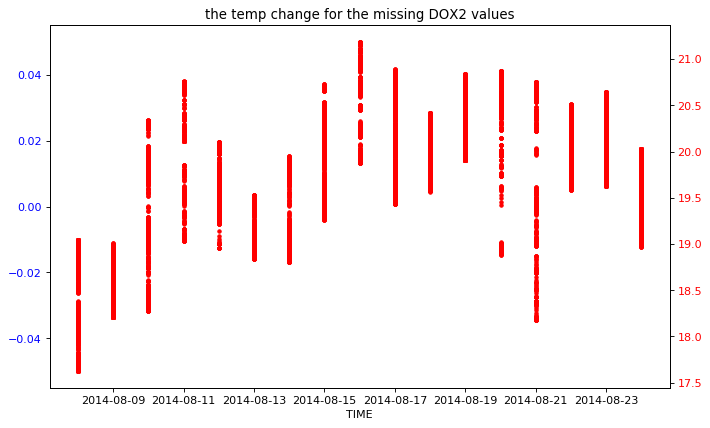

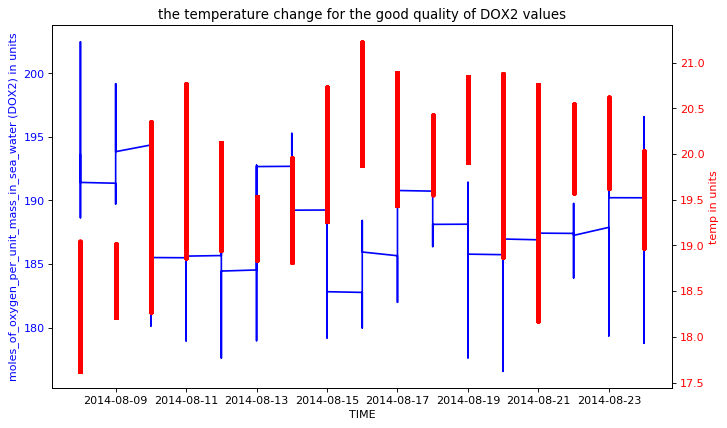

In [57]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
tempData = do2missing['TEMP'].values

# plot depth and DOX2 missing value timeseries
figure3 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax5 = figure3.add_subplot(111)
ax5.plot(TIME,do2Data, 'b-')
ax5.set_xlabel('TIME')
ax5.set_title('the temp change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax5.get_yticklabels():
    tl.set_color('b')

ax6 = ax5.twinx()
ax6.plot(TIME,tempData, 'r.')
ax2.set_ylabel('TEMP' + ' in units', color='r')
for tl in ax6.get_yticklabels():
    tl.set_color('r')
    

# good quality DOX2
do2Valid=Two_14.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
tempvData = do2Valid['TEMP'].values

# plot depth and DOX2 good quality data timeseries
figure4 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax6 = figure4.add_subplot(111)
ax6.plot(TIME,do2vData, 'b-')
ax6.set_xlabel('TIME')
ax6.set_title('the temperature change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax6.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax6.get_yticklabels():
    t3.set_color('b')

ax7 = ax6.twinx()
ax7.plot(TIME,tempvData, 'r.')
ax7.set_ylabel('temp' + ' in units', color='r')
for t4 in ax7.get_yticklabels():
    t4.set_color('r')

show()

In [59]:
# corr plot for each variable, select those with corr>0.5 as training features
corr = do2Valid.corr() 
corr[(corr.abs()>0.5) & (corr.abs() < 1.0)].style.background_gradient(cmap='coolwarm')

D:\2018 UNSW\python-download\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [125]:
#imputation data

# Train-test split

X = do2Valid[['PRES','DEPTH','PROFILE','TEMP','PSAL','CNDC','IRRAD443','IRRAD490','IRRAD555','IRRAD670']]
# Target value
y = do2Valid['DOX2'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Import knn 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
model = knn.fit(X_train,y_train.astype('int'))
y_pred = knn.predict(X_test)

# Test the accuracy score of the model
from sklearn.metrics import accuracy_score
print('the accuracy of testing data on DOX2 is:',accuracy_score(y_test.astype('int'), y_pred))

the accuracy of testing data on DOX2 is: 0.891786367301965


In [144]:
missing_dox2= do2missing['DOX2']
#predict the DOX2 value for the whole Two_14 dataset
df_missing_dox2 = pd.DataFrame(Two_14[['PRES','DEPTH','PROFILE','TEMP','PSAL','CNDC','IRRAD443','IRRAD490','IRRAD555','IRRAD670']])
imputed_dox2 = model.predict(df_missing_dox2)
print('the array of knn prediction:',imputed_dox2)

the array of knn prediction: [193 193 193 ... 189 189 189]


In [165]:
indicies_of_missing = Two_14[Two_14['DOX2'].isnull()].index # list of the missing indices
Two_14.head(5)
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    if pd.isnull(Two_14.loc[dataframe_index, 'DOX2']):
        Two_14.loc[dataframe_index,'DOX2'] = imputed_dox2[fill_index]
    else:
        continue

In [171]:
print("the number of missing DOX2 after imputation is", Two_14['DOX2'].isnull().sum())

the number of missing DOX2 after imputation is 0


In [173]:
#do similar for VBSC  -- 86+9 keep bad delete
#VBSC: quality control flag for volume_scattering_function
vbQ = Two_14.VBSC_quality_control.unique() #has good/bad type : type 1 & 4

vbbad=Two_14.loc[df['VBSC_quality_control'] == 4.]
#update Two_14
Two_14 = Two_14[(Two_14['VBSC_quality_control'] != 4.)]
vbmissing = Two_14.loc[df['VBSC_quality_control'] != 1.]
print('number of missing value is:',len(vbmissing),'and the pecentage is',round(len(vbmissing)/len(Two_14),4)*100,'%')

number of missing value is: 0 and the pecentage is 0.0 %


In [175]:
#irrade 45% bad
#quality control flag for downwelling_spectral_irradiance_in_sea_water_beam1

ir4Q = Two_14.IRRAD443_quality_control.unique()
print('type of IRRAD443 is',ir4Q) 

ir4bad=Two_14.loc[df['IRRAD443_quality_control'] == 4.]
print('the number of bad data for IRRAD443',len(ir4bad),', and the pecentage is',round(len(ir4bad)/len(Two_14),4)*100,'%')
#update Two_14
Two_14 = Two_14[(Two_14['IRRAD443_quality_control'] != 4.)]
ir4missing = Two_14.loc[df['IRRAD443_quality_control'] != 1.]
print('number of missing value is:',len(do2missing),'and the pecentage is',round(len(ir4missing)/len(Two_14),4)*100,'%')

type of IRRAD443 [4. 1.]
the number of bad data for IRRAD443 296939 , and the pecentage is 45.36 %
number of missing value is: 55056 and the pecentage is 0.0 %


In [180]:
ir9Q = Two_14.IRRAD490_quality_control.unique()
print('type of IRRAD490',ir9Q) 
ir5Q = Two_14.IRRAD555_quality_control.unique()
print('type of IRRAD555',ir5Q) 
ir6Q = Two_14.IRRAD670_quality_control.unique()
print('type of IRRAD670',ir6Q) 
ir6bad=Two_14.loc[df['IRRAD670_quality_control'] == 4.]
print('the number of bad data for IRRAD670',len(ir6bad),', and the pecentage is',round(len(ir6bad)/len(Two_14),4)*100,'%')
#update Two_14
Two_14 = Two_14[(Two_14['IRRAD670_quality_control'] != 4.)]

type of IRRAD490 [1.]
type of IRRAD555 [1.]
type of IRRAD670 [1. 4.]
the number of bad data for IRRAD670 182 , and the pecentage is 0.05 %


In [192]:
del Two_14['NTRA_quality_control']
del Two_14['UCUR_quality_control']
del Two_14['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#THus UCUR_GPSand VCUR_GPS null value can be deleted

del Two_14['UCUR_GPS']
del Two_14['UCUR_GPS_quality_control']
del Two_14['VCUR_GPS']
del Two_14['VCUR_GPS_quality_control']
print(Two_14.isnull().sum())
#only HEAD exists non-value
print(Two_14.isnull().sum())

FID                            0
file_id                        0
deployment_name                0
platform_type                  0
platform_code                  0
time_coverage_start            0
time_coverage_end              0
TIME                           0
TIME_quality_control           0
LATITUDE                       0
LATITUDE_quality_control       0
LONGITUDE                      0
LONGITUDE_quality_control      0
PRES                           0
PRES_quality_control           0
DEPTH                          0
DEPTH_quality_control          0
PROFILE                        0
PROFILE_quality_control        0
PHASE                          0
PHASE_quality_control          0
TEMP                           0
TEMP_quality_control           0
PSAL                           0
PSAL_quality_control           0
DOX1                           0
DOX1_quality_control           0
DOX2                           0
DOX2_quality_control           0
CPHL                           0
CPHL_quali

In [195]:
#HEAD:TIME LATITUDE LONGITUDE


heQ = Two_14.HEAD_quality_control.unique()
print('type of HEAD',heQ)
hemissing=Two_14.loc[df['HEAD_quality_control'] == 9.]
print('the number of missing data for HEAD',len(hemissing),', and the pecentage is',round(len(hemissing)/len(Two_14),4)*100,'%')
#update Two_14
Two_14 = Two_14[(Two_14['HEAD_quality_control'] != 9.)]

type of HEAD [0. 9.]
the number of missing data for HEAD 343 , and the pecentage is 0.1 %


In [197]:
print(Two_14.isnull().sum())
#there is no missing values 

#----------'TwoRocks20140808'---------  output the rawdata as CSV
Two_14.to_csv (r'C:\Users\xinyu\Desktop\data\TwoRocks20140808.csv', index = False, header=True)
print (Two_14)

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [8]:
df.isnull().sum()

FID                                0
file_id                            0
deployment_name                    0
platform_type                      0
platform_code                      1
time_coverage_start                1
time_coverage_end                  1
TIME                               1
TIME_quality_control               1
LATITUDE                        2077
LATITUDE_quality_control           1
LONGITUDE                       2077
LONGITUDE_quality_control          1
PRES                            6895
PRES_quality_control               1
DEPTH                           7687
DEPTH_quality_control              1
PROFILE                         1556
PROFILE_quality_control            1
PHASE                           7049
PHASE_quality_control              1
TEMP                            1410
TEMP_quality_control               1
PSAL                            7252
PSAL_quality_control               1
DOX1                          641383
DOX1_quality_control               1
D